In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (11, 6)
# figure resolution in DPI
figure_resolution = 200 

data_dir = './Figure_Data'

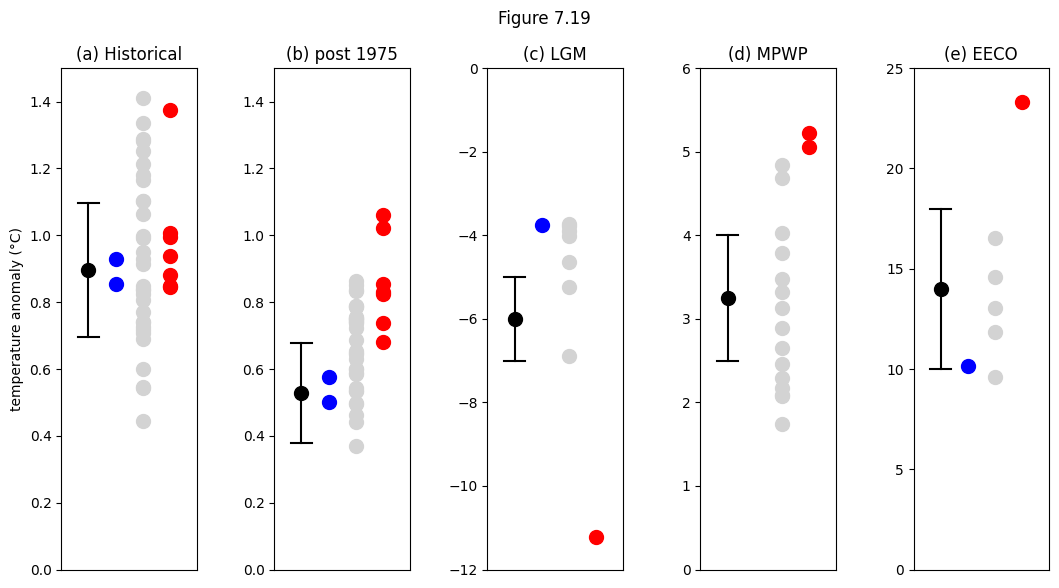

In [77]:
df_obs = pd.read_csv(data_dir + '/Figure7_19_obs.csv', header=2)
df_mod = pd.read_csv(data_dir + '/Figure7_19_mod.csv', header=2)

fig, ax = plt.subplots(1,5)
fig.tight_layout(pad=2.5)
plt.suptitle('Figure 7.19', y=1.03)

ax[0].set_ylabel('temperature anomaly (°C)')

time_periods = ["Historical", "post 1975", "LGM", "MPWP", "EECO"]
panel_labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
ymin = [0.0, 0.0, -12, 0.0, 0.0]
ymax = [1.5, 1.5, 0.0, 6.0, 25.0]

for counter, time in enumerate(time_periods):
    
    ax[counter].set_title(panel_labels[counter] + " " + time)
    lim = ax[counter].set_ylim(ymin[counter],ymax[counter])
    # obs
    ax[counter].plot([1, 1], [df_obs['min temperature [degreesC]'][counter], df_obs['max temperature [degreesC]'][counter]], c="black")
    ax[counter].plot([0.6, 1.4], [df_obs['min temperature [degreesC]'][counter], df_obs['min temperature [degreesC]'][counter]], c="black")
    ax[counter].plot([0.6, 1.4], [df_obs['max temperature [degreesC]'][counter], df_obs['max temperature [degreesC]'][counter]], c="black")
    ax[counter].scatter([1.0], [df_obs['mean temperature [degreesC]'][counter]], c="black", s=100)
    # models
    for index, row in df_mod.iterrows():
        if row['Time Period'] == time:
            ecs_flag = int(row['Model ECS (High[1], Low[-1], or Middle[0]'])
            if ecs_flag == 1:
                color = "red"
                xpos  = 4 
            elif ecs_flag == 0:
                color = "lightgray"
                xpos  = 3 
            elif ecs_flag == -1:
                color = "blue"
                xpos  = 2 
            else:
                print(row['Model ECS (High[1], Low[-1], or Middle[0]'])
                break
            ax[counter].scatter(xpos, row['Temperature Anomaly [degrees C]'], c=color, s=100)


# set settings for each panel in loop
for axis in ax.flat:
    # turn off bottom labels
    axis.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.savefig('new_figure_7.19.png', dpi=figure_resolution, bbox_inches='tight')
